In [1]:
from fenics import *
import sys
sys.path.append('../data/')
sys.path.append('../graphnics/')
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import imp

import graph_utils as gu

In [4]:
from load_pial_network import load_dataset
imp.reload(gu)

G_ = load_dataset(dataset='../data/041707-R01.mat')

# flip y-axis
for i in range(0, len(G_.nodes)): 
    G_.nodes[i]['pos'][1]=-G_.nodes[i]['pos'][1]

new_node_ix = len(G_.nodes())
connect_to_ix = 0#669
G_.add_node(new_node_ix)
G_.add_edge(new_node_ix, connect_to_ix)                     

G_.nodes()[new_node_ix]['pos']=[G_.nodes()[connect_to_ix]['pos'][0], G_.nodes()[connect_to_ix]['pos'][1]-50] 

G = gu.assign_radius_using_Murrays_law(G_, start_node=2043, start_radius=1)

# Plot network
plt.figure(figsize=(40,40))
pos=nx.get_node_attributes(G_,'pos')
#nx.draw_networkx(G_, pos, with_labels=True, node_size=0)

Dataset contains 2043 nodes


<Figure size 2880x2880 with 0 Axes>

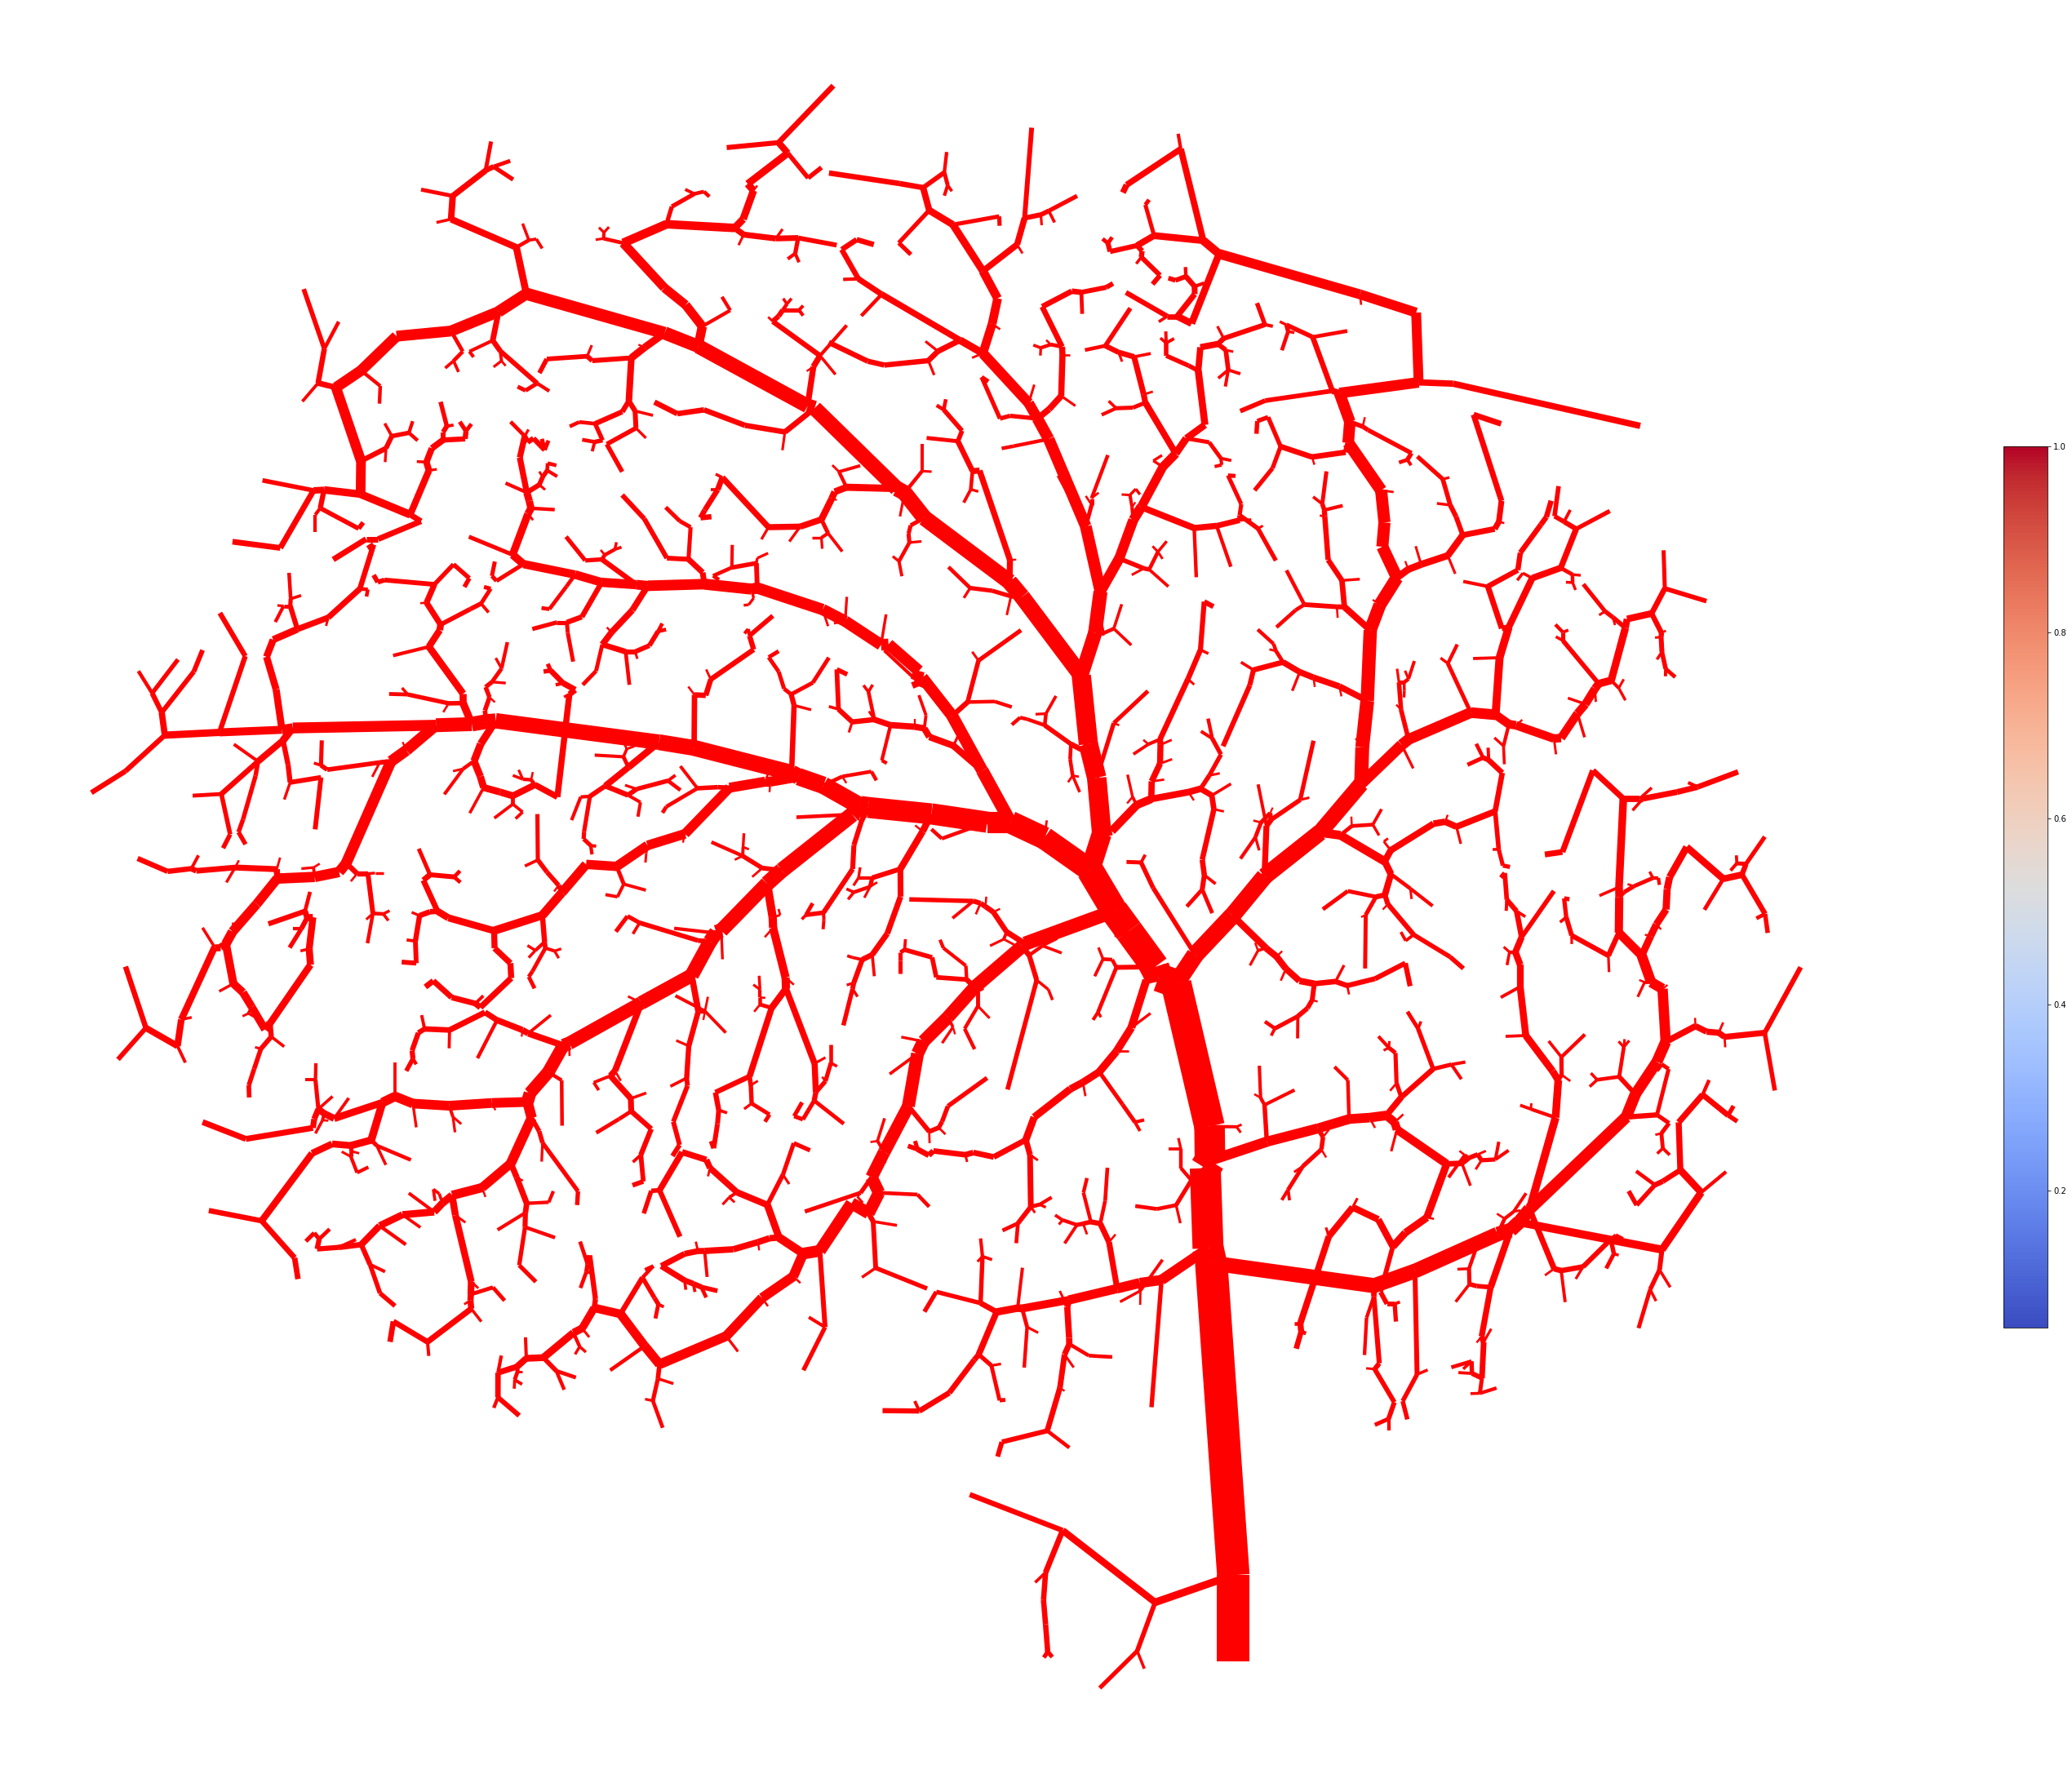

In [5]:
edges,weights = zip(*nx.get_edge_attributes(G,'radius').items())

weights = np.asarray(weights)
cmap = plt.cm.coolwarm

plt.figure(figsize=(40,30))
c = nx.draw(G, pos, node_color='b', node_size=0, edgelist=edges, vmin = 0, vmax=1,
            edge_color='r', width=40*weights, edge_cmap=cmap, arrows=False)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = np.min(weights), vmax=np.max(weights)))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
#cbar.ax.tick_params(labelsize=80, length=50, width=10) 

In [6]:
from fenics_graph import *
G = copy_from_nx_graph(G)
mesh1 = G.make_mesh()

mesh = UnitCubeMesh(100, 100, 100)
mesh1 = G.global_mesh

mesh1.coordinates()

RuntimeError: *** Error: Duplication of MPI communicator failed (MPI_Comm_dup

In [31]:
V3, V1 = FunctionSpace(mesh, 'CG', 1), FunctionSpace(mesh1, 'CG', 1)

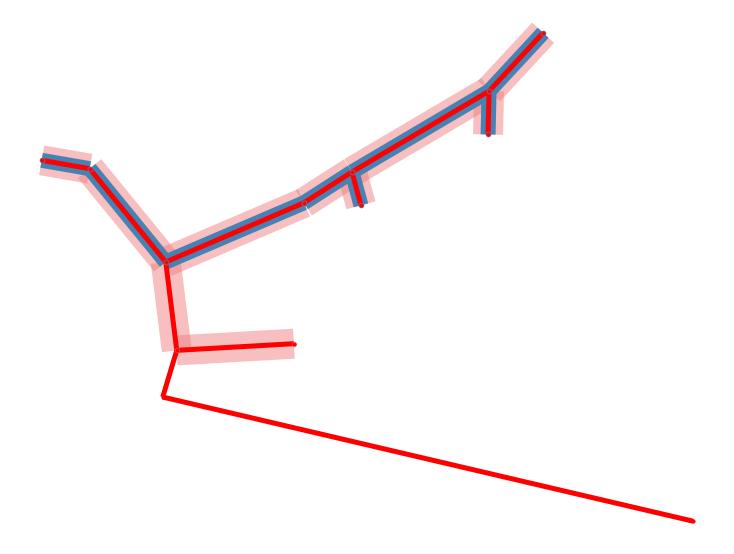

In [4]:
### 
weights = np.asarray(weights)
cmap = plt.cm.coolwarm

plt.figure(figsize=(10, 7.5))

Gsub_ = G.subgraph(nx.shortest_path(G, 276))
c = nx.draw(Gsub_, pos, node_color='lightcoral', node_size=20, edge_color='lightcoral', 
            width=30, arrows=False, alpha=0.5)


Gsub_ = G.subgraph(nx.shortest_path(G, 277))
c = nx.draw(Gsub_, pos, node_color='steelblue', node_size=20, edge_color='steelblue', width=15, arrows=False)

Gsub = G.subgraph(nx.shortest_path(G, 273))
c = nx.draw(Gsub, pos, node_color='r', node_size=10, edge_color='r', width=5, arrows=False)

plt.savefig('subG.png')

1.766123775561495


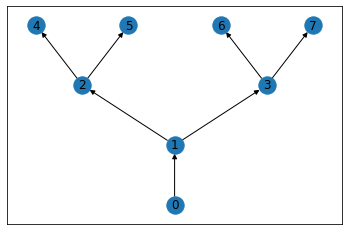

In [132]:
from graph_examples import *
G = make_double_Y_bifurcation()

mesh = G.make_mesh(store_mesh = False, n=0)
V = FunctionSpace(mesh, 'CG', 1)
dist_func = Function(V)

dist_func.vector()[0] = 1
dist_func.vector()[1] = 1

imp.reload(gu)

dist_from_source = gu.DistFromSource(G, 0, degree=2)
print(dist_from_source(0.75, 1.5, 0))

dist_should_be = 1.766123


# Flatten to 2D and plot
G_2D = G.copy() # deep copy
for v in G.nodes():
    G_2D.nodes[v]['pos'] = G.nodes[v]['pos'][0:2]
pos=nx.get_node_attributes(G_2D,'pos')
nx.draw_networkx(G_2D, pos)


In [133]:
gu.test_dist_from_source()

In [122]:
nx.shortest_path(G, 0, 4)


[0, 1, 2, 4]

In [88]:
G = make_line_graph(10)



{}